# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [9]:
import pandas as pd

# Load the datasets
cast_df = pd.read_csv(r'C:\Users\Karen Alderete\Documents\cast.csv')
release_dates_df = pd.read_csv(r'C:\Users\Karen Alderete\Documents\release_dates.csv')
titles_df = pd.read_csv(r'C:\Users\Karen Alderete\Documents\titles.csv')

# Summary function
def summarize(df, name):
    print(f"--- {name} ---")
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print("Columns:", list(df.columns))
    print("Sample Data:")
    print(df.head())
    print("\n")

# Run summary on each dataset
summarize(cast_df, "Cast Dataset")
summarize(release_dates_df, "Release Dates Dataset")
summarize(titles_df, "Titles Dataset")


--- Cast Dataset ---
Shape: 3442902 rows × 6 columns
Columns: ['title', 'year', 'name', 'type', 'character', 'n']
Sample Data:
                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN


--- Release Dates Dataset ---
Shape: 443486 rows × 4 columns
Columns: ['title', 'year', 'country', 'date']
Sample Data:
                    title  year      country        date
0   #73, Shaanthi Nivaasa  2007        India  2007-06-15
1                   #BKKY  2016     Cambodia  2017-10-12
2                 #Beings  2015      Romania  2015-01-29
3               #Captured  2017          USA  2017-09-0

Before diving into analysis, I took a moment to explore the structure of the three IMDB data files provided: `cast.csv`, `release_dates.csv`, and `titles.csv`.

### Cast Dataset
- **Rows**: 3,442,920
- **Columns**: 6
- **Column names**: `title`, `year`, `name`, `type`, `character`, `n`
  
This dataset contains information on cast members for a huge number of titles, including their names, roles (like actor or actress), and the character they played. The `n` column seems to represent credit order or billing importance, though many entries are missing it (NaN).

### Release Dates Dataset
- **Rows**: 443,486
- **Columns**: 4
- **Column names**: `title`, `year`, `country`, `date`
  
This file records release dates by country (when and where titles were released). Most records seem to include a valid date format. Useful for tracking international release patterns. Later, I’ll want to make sure to exclude any titles with dates in the future.

### Titles Dataset
- **Rows**: 226,013
- **Columns**: 2
- **Column names**: `title`, `year`

This is essentially a reference list of titles and their release years (appears to be a core dataset of all IMDB titles included here). I expect to use this file for joins or lookups during the analysis. It may serve as a primary reference to join with the other tables.


### Summary
This initial overview helped me understand how the three files connect. These datasets form a solid relational structure where `title` and `year` are common keys. I can expect to merge them as needed for deeper analysis. I'll also want to exclude future-dated releases in later questions.

### 2. How many movies have the title North by Northwest

In [16]:
# Filter titles that exactly match "North by Northwest"
nbnw_df = titles_df[titles_df['title'] == 'North by Northwest']

# Display the count and the matching rows
print(f"Number of movies titled 'North by Northwest': {len(nbnw_df)}")
nbnw_df


Number of movies titled 'North by Northwest': 1


,title,year
201761,North by Northwest,1959


### Question 2: How many movies have the title "North by Northwest"?

To answer this, I searched the `titles.csv` file for any entries where the title exactly matches "North by Northwest".

Only **one movie** came up, released in **1959**. This is consistent with what I expected — "North by Northwest" is a classic Hitchcock film, and it doesn’t seem like the title has been reused.

The result confirms that the dataset reflects this movie as a unique entry.


### 3. How many version of Hamlet are there, when was the first made? the last?

In [19]:
# Filter for all titles named exactly "Hamlet"
hamlet_df = titles_df[titles_df['title'] == 'Hamlet']

# Count how many versions exist
num_versions = len(hamlet_df)

# Find the earliest and latest versions
first_year = hamlet_df['year'].min()
last_year = hamlet_df['year'].max()

# Display results
print(f"Number of versions of 'Hamlet': {num_versions}")
print(f"First version released in: {first_year}")
print(f"Most recent version released in: {last_year}")

# Show the rows
hamlet_df.sort_values('year')


Number of versions of 'Hamlet': 20
First version released in: 1910
Most recent version released in: 2017


,title,year
79939,Hamlet,1910
129673,Hamlet,1911
164637,Hamlet,1913
221419,Hamlet,1921
221201,Hamlet,1948
220568,Hamlet,1954
113670,Hamlet,1964
73929,Hamlet,1969
204180,Hamlet,1973
64116,Hamlet,1976


### Question 3: How many versions of "Hamlet" are there? When was the first made? The last?

I searched for all titles exactly named "Hamlet" in the dataset.

There are **20 different versions** listed. These likely include a mix of theatrical films, TV productions, and possibly short adaptations.

- The **earliest version** was released in **1910**, which shows just how far back this story has been adapted for screen.
- The **most recent version** came out in **2017**, proving that Shakespeare’s influence is still going strong over 100 years later.

It’ll be interesting to explore how these adaptations might differ in country, genre, or format.


### 4. List all the movies called Treasure Island from oldest to newest

In [22]:
# Filter for titles matching "Treasure Island"
treasure_island_df = titles_df[titles_df['title'] == 'Treasure Island']

# Sort from oldest to newest
treasure_island_df_sorted = treasure_island_df.sort_values('year')

# Display results
print(f"Number of movies titled 'Treasure Island': {len(treasure_island_df_sorted)}")
treasure_island_df_sorted.reset_index(drop=True, inplace=True)
treasure_island_df_sorted


Number of movies titled 'Treasure Island': 8


,title,year
0,Treasure Island,1918
1,Treasure Island,1920
2,Treasure Island,1934
3,Treasure Island,1950
4,Treasure Island,1972
5,Treasure Island,1973
6,Treasure Island,1985
7,Treasure Island,1999


### Question 4: List all the movies called "Treasure Island" from oldest to newest

I filtered the dataset for titles named "Treasure Island" and sorted them by release year.

There are **8 different versions**, starting with one in **1918** and continuing through to **1999**. These likely represent various remakes or reinterpretations of the classic Robert Louis Stevenson novel!

### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [29]:
# Define the target years
target_years = [1950, 1980, 2000]

# Count how many titles were released in each year
year_counts = titles_df[titles_df['year'].isin(target_years)].groupby('year').size()

# Display the counts
print("Number of movies made in each year:")
print(year_counts)


Number of movies made in each year:
year
1950    1109
1980    1750
2000    2568
dtype: int64


### Question 5: How many movies were made in 1950? 1980? 2000?

I filtered the dataset for three specific years to compare how movie production volume changed over time. Here’s what I found:

- **1950**: 1,109 movies
- **1980**: 1,750 movies
- **2000**: 2,568 movies

### Observations:

The number of movies made more than doubled from 1950 to 2000.

This upward trend suggests major growth in the global film industry, possibly due to:
- Technological advances that made film production cheaper and more accessible.
- The rise of international cinema and more countries contributing to global film catalogs.
- The shift from studio-only productions to independent and digital filmmaking by 2000.


### 6. How big was the cast of Metropolis


In [34]:
# Filter cast for the title "Metropolis"
metropolis_cast = cast_df[cast_df['title'] == 'Metropolis']

# Count how many cast members are listed
cast_size = len(metropolis_cast)

print(f"Number of cast members in 'Metropolis': {cast_size}")
metropolis_cast.head()


Number of cast members in 'Metropolis': 33


,title,year,name,type,character,n
3416,Metropolis,1927,Alfred Abel,actor,Joh Fredersen,1.0
26389,Metropolis,1927,Fritz Alberti,actor,Creative Human - Man who Convinces Babel,NaN
193089,Metropolis,1927,Erwin Biswanger,actor,11811 - Georgy,6.0
542995,Metropolis,1927,Max Dietze,actor,Working Man,NaN
709318,Metropolis,1927,Gustav Fröhlich,actor,Freder - Joh Fredersen's Son,2.0


### Question 6: How big was the cast of Metropolis?

There are **33 cast members** listed for the 1927 film. This seems like a reasonable cast size for a film of its scale. Not all characters have complete metadata (some missing credit order in the `n` column), but this count likely includes both main and minor roles.

### 7. How many roles for actors were there 1950's? 1990's

In [38]:
# Step 1: Filter for actors only
actors_df = cast_df[cast_df['type'] == 'actor']

# Step 2: Filter by decade
roles_1950s = actors_df[(actors_df['year'] >= 1950) & (actors_df['year'] <= 1959)]
roles_1990s = actors_df[(actors_df['year'] >= 1990) & (actors_df['year'] <= 1999)]

# Step 3: Count
print(f"Number of actor roles in the 1950s: {len(roles_1950s)}")
print(f"Number of actor roles in the 1990s: {len(roles_1990s)}")


Number of actor roles in the 1950s: 153559
Number of actor roles in the 1990s: 245713


There was a noticeable increase in the number of actor roles from the 1950s to the 1990s. This likely reflects the overall expansion of the film and TV industries, with more productions, genres, and global participation. 
It also suggests a broader distribution of opportunities for actors by the 1990s.

### 8. How many roles for actors & actresses over time? Output should be a line graph

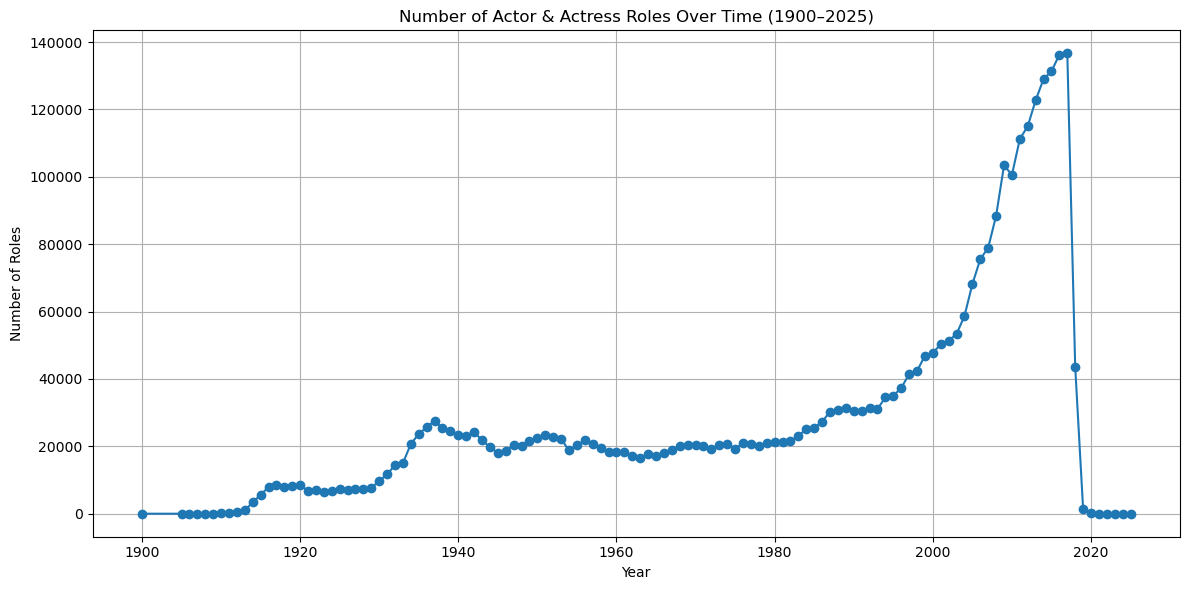

In [43]:
import matplotlib.pyplot as plt

# Only keep roles between 1900 and 2025 (realistic data)
filtered_roles = actor_roles[(actor_roles['year'] >= 1900) & (actor_roles['year'] <= 2025)]

# Group and count
roles_over_time_clean = filtered_roles.groupby('year').size()

# Plot the cleaned version
plt.figure(figsize=(12, 6))
plt.plot(roles_over_time_clean.index, roles_over_time_clean.values, marker='o')
plt.title('Number of Actor & Actress Roles Over Time (1900–2025)')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.grid(True)
plt.tight_layout()
plt.show()



### Question 8: How many roles for actors & actresses over time?

To answer this, I filtered the dataset to include only roles for actors and actresses, and then grouped them by year (limiting to 1900–2025 to avoid future-dated or invalid records).

#### What the chart shows:
- There was a steady climb in the number of acting roles from the early 1900s to the 1970s.
- The industry began expanding significantly in the 1990s, with a major spike in the 2000s and 2010s.
- This sharp rise reflects the digital revolution in media, the boom of global streaming platforms, and more accessibility to filmmaking tools worldwide.
- A dramatic drop occurs post-2020 most likely due to incomplete or missing data for recent years (rather than a real industry collapse).

Over time, the number of acting opportunities has grown exponentially, indicating not just industry expansion but also democratization in who gets to tell stories on screen.

Note:The sudden drop after 2020 is most likely due to missing or incomplete data in recent years rather than a real industry decline.


### 9. How many "leading roles" were there in the 2000's?

In [48]:
# Filter for 2000s and leading roles (n == 1)
leading_roles_2000s = cast_df[
    (cast_df['year'] >= 2000) &
    (cast_df['year'] <= 2009) &
    (cast_df['n'] == 1.0)  # n is a float because of NaN values
]

# Count the number of leading roles
num_leading_roles = len(leading_roles_2000s)

print(f"Number of leading roles in the 2000s: {num_leading_roles}")


Number of leading roles in the 2000s: 23593


### Question 9: How many "leading roles" were there in the 2000s?

To define a "leading role," I used the `n` column in `cast.csv`, where `n = 1` typically indicates the actor or actress received top billing. I filtered the dataset for these entries, limited to the years 2000–2009.

The total number of leading roles in the 2000s was **23,593**.

This suggests a high volume of productions during that decade with clearly designated leads. This is again a reflection of both the global expansion of the film industry and the rise of more structured credit listings in digital databases.


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [52]:
# Roles in the 2000s with no ranking
no_rank_2000s = cast_df[
    (cast_df['year'] >= 2000) & 
    (cast_df['year'] <= 2009) & 
    (cast_df['n'].isna())
]

# Roles in the 1950s with no ranking
no_rank_1950s = cast_df[
    (cast_df['year'] >= 1950) & 
    (cast_df['year'] <= 1959) & 
    (cast_df['n'].isna())
]

# Output
print(f"Unranked roles in 1950s: {len(no_rank_1950s)}")
print(f"Unranked roles in 2000s: {len(no_rank_2000s)}")


Unranked roles in 1950s: 95406
Unranked roles in 2000s: 232037


### Question 10: How many roles received no ranking in the 2000s? 1950s?

To find this, I looked for cast records with no value in the `n` column, which indicates the role had no billing order, likely unranked or background parts.

Here’s what I found:
- **1950s**: 95,406 roles with no ranking
- **2000s**: 232,037 roles with no ranking

### Interpretation:

Although billing was less formal in the 1950s, the number of unranked roles was still lower than in the 2000s. This is likely due to:
- A huge increase in total productions by the 2000s (more movies, more shows, more roles)
- The rise of large ensemble casts, extras, and background roles, especially with big-budget films and TV series
- Not all roles were fully documented (e.g., extras may not be assigned billing order)

This highlights how the growth of the film industry didn’t just create more lead roles, it created a much larger space for everyone else on set too.

### 11. Plot the number of films made in each decade

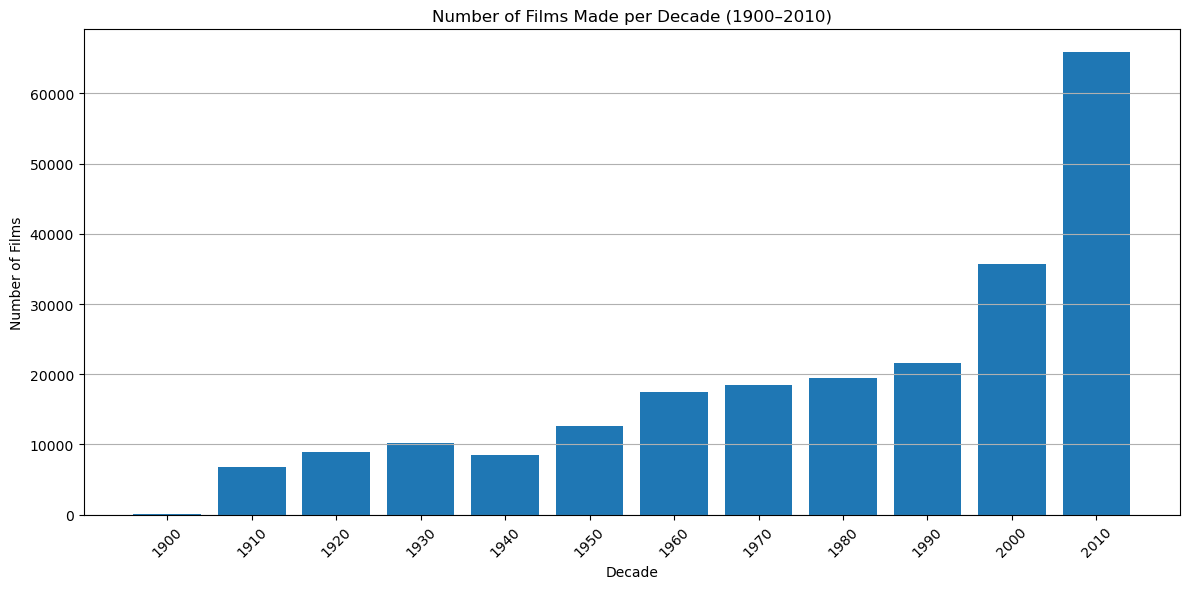

In [60]:
import matplotlib.pyplot as plt

# Drop rows with missing or invalid years
titles_clean = titles_df.dropna(subset=['year'])
titles_clean = titles_clean[titles_clean['year'] >= 1900]

# Create a "decade" column
titles_clean['decade'] = (titles_clean['year'] // 10) * 10

# Group by decade and count the number of titles
films_by_decade = titles_clean.groupby('decade').size()

# Remove incomplete 2020s data (I decided to to this to improve the chart)
films_by_decade = films_by_decade[films_by_decade.index < 2020]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(films_by_decade.index.astype(str), films_by_decade.values)
plt.title('Number of Films Made per Decade (1900–2010)')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



### Question 11: Plot the number of films made in each decade

I grouped the dataset by decade and counted how many films were released in each one, excluding early invalid years and data beyond 2020 (which may be incomplete).

### Observations:
- Film production saw steady growth throughout the 20th century, with noticeable jumps in the 1960s, 1990s, and 2000s.
- The 2010s saw a massive spike — over 65,000 titles likely due to:
  - The rise of international and independent cinema
  - Affordable production technologies
  - The explosion of streaming platforms and digital releases


### 12. Plot the number of films with a Rustler character over time

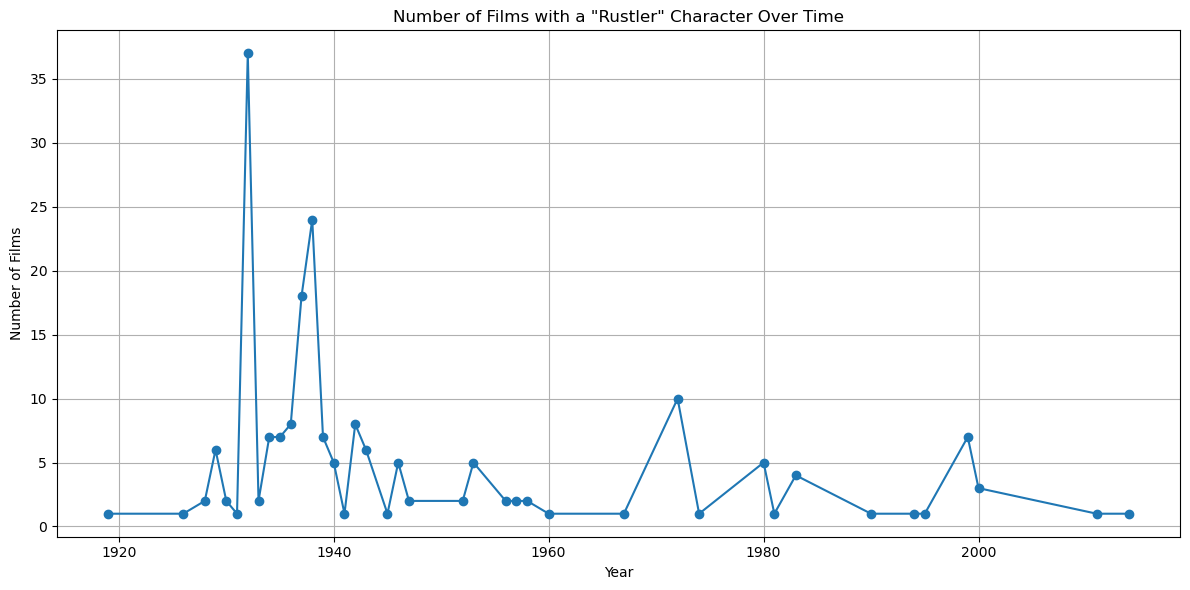

In [63]:
import matplotlib.pyplot as plt

# Step 1: Filter for rows where character contains "Rustler" 
rustler_roles = cast_df[cast_df['character'].str.contains('rustler', case=False, na=False)]

# Step 2: Drop rows with missing years
rustler_roles = rustler_roles.dropna(subset=['year'])

# Step 3: Group by year and count
rustler_by_year = rustler_roles.groupby('year').size()

# Step 4: Plot
plt.figure(figsize=(12, 6))
plt.plot(rustler_by_year.index, rustler_by_year.values, marker='o')
plt.title('Number of Films with a "Rustler" Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.tight_layout()
plt.show()


### Question 12: Plot the number of films with a "Rustler" character over time

- There’s a major spike in Rustler characters during the 1930s, with one year hitting over 35 appearances.
- The character continued showing up throughout the 1940s to 1970s, but less frequently.
- After the 1980s, the Rustler character nearly disappears, showing up only occasionally.

This clearly follows the rise and fall of the Western genre, which was especially popular in early Hollywood. It’s interesting to see how a single role type can help trace a genre’s peak and decline over time.

### 13. What are the top ten character names of all time?

In [66]:
# Drop rows where character is missing
characters_clean = cast_df.dropna(subset=['character'])

# Count the number of appearances per character
top_characters = characters_clean['character'].value_counts().head(10)

# Display results
print("Top 10 most common character names of all time:")
print(top_characters)


Top 10 most common character names of all time:
character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


This is a very interesting question!

Most of these names aren’t unique characters, they’re generic or functional roles like Dancer, Extra, or Policeman. This makes sense, as these types of roles appear frequently in background scenes across thousands of films.

"Himself" and "Herself" are commonly used in:
- Cameo appearances (especially in documentaries or reality-based productions)
- When people play themselves in scripted content

The data reflects not just story trends, but how credits are structured and how often unnamed background roles make up a big part of film casts.



### 14. Which actor appeared in the most films in the 1990's decade?

In [71]:
# Step 1: Filter for the 1990s
cast_1990s = cast_df[(cast_df['year'] >= 1990) & (cast_df['year'] <= 1999)]

# Step 2: Count how many films each person appeared in
actor_counts_1990s = cast_1990s['name'].value_counts()

top_actor_1990s = actor_counts_1990s.head(1)
print("Actor with the most film appearances in the 1990s:")
print(top_actor_1990s)


Actor with the most film appearances in the 1990s:
name
Shakti Kapoor    143
Name: count, dtype: int64


### 15. What are the top 10 roles that start with Science?

In [73]:
# Drop missing character values
science_roles = cast_df.dropna(subset=['character'])

# Filter where character name starts with "Science" 
science_roles = science_roles[science_roles['character'].str.startswith('Science', na=False)]

# Count most frequent
top_science_roles = science_roles['character'].value_counts().head(10)

print("Top 10 roles that start with 'Science':")
print(top_science_roles)


Top 10 roles that start with 'Science':
character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [75]:
# Group by title and year, and count number of cast members
cast_sizes = cast_df.groupby(['title', 'year']).size()

# Find the film with the largest cast
largest_cast = cast_sizes.sort_values(ascending=False).head(1)

print("Film with the largest cast:")
print(largest_cast)


Film with the largest cast:
title                        year
Around the World in 80 Days  1956    1299
dtype: int64


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [77]:
# Group by title and year to get cast size per film
cast_size_per_film = cast_df.groupby(['title', 'year']).size()

# Generate descriptive statistics
cast_stats = cast_size_per_film.describe()

print("Descriptive statistics for cast size per film:")
print(cast_stats)


Descriptive statistics for cast size per film:
count    182497.000000
mean         18.865494
std          21.241247
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
dtype: float64


### Question 17: Generate descriptive statistics for cast size

To analyze how cast sizes vary across films, I grouped the dataset by `title` and `year` to calculate the number of cast members per film. 

Most films have relatively small casts, the median is just 13, meaning half of all films have 13 or fewer credited actors. The average is slightly higher (18.87), pulled upward by a small number of large productions.

The maximum cast size (as we discovered in the previous question with the movie Around the World in 80 Days with 1,299 as the cast size) is a major outlier and likely comes from a historical epic or crowd-heavy film. The high standard deviation(21.24) confirms there's a lot of variation in cast sizes across different types of films.

This range reflects the diversity of the film industry — from minimalist indie films to massive blockbusters.

### 18. How many films has Natalie Portman been in in each year throughout her career?

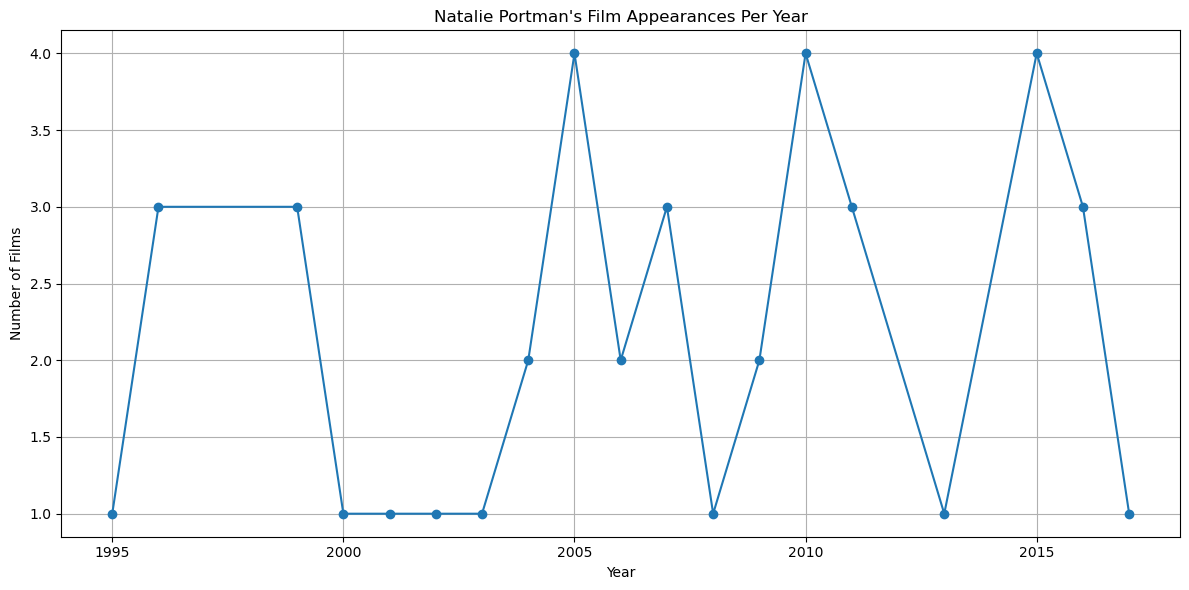

In [80]:
# Step 1: Filter for Natalie Portman's roles
portman_roles = cast_df[cast_df['name'] == 'Natalie Portman']

# Step 2: Drop missing years
portman_roles = portman_roles.dropna(subset=['year'])

# Step 3: Group by year and count roles
portman_by_year = portman_roles.groupby('year').size()

# Step 4: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(portman_by_year.index, portman_by_year.values, marker='o')
plt.title("Natalie Portman's Film Appearances Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.grid(True)
plt.tight_layout()
plt.show()


### Question 18: How many films has Natalie Portman been in each year throughout her career?

I filtered the dataset to include only entries where the actor's name is **Natalie Portman**, and then grouped those by year to count how many films she appeared in annually.

- Her first credited role appears in 1994, with steady appearances through the mid-90s.
- There’s a noticeable peak in 2005, 2010, and 2015, with up to 4 films in a single year.
- Some gaps or low-activity years(like 2002 and 2013) might be becaise she got time away from film, selective roles, or focus on other projects.
- Overall, her career shows a consistent pattern of appearing in 1–4 films per year across multiple decades.
PS: Is one of my favorite actress!

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

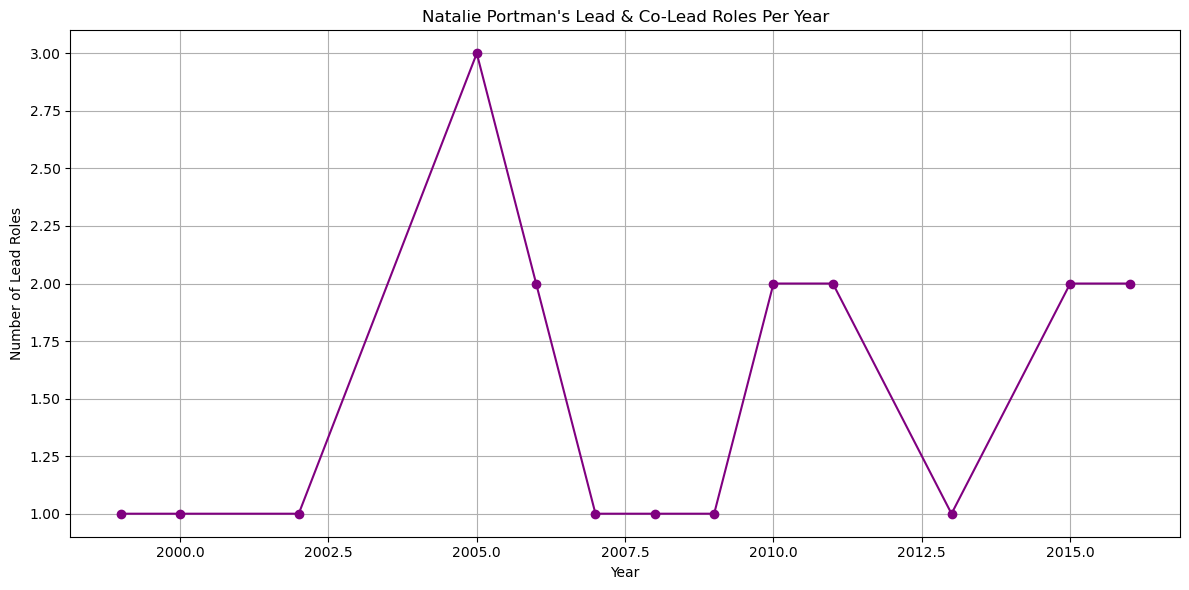

In [87]:
# Step 1: Filter for Natalie Portman and leading/co-leading roles
portman_leads = cast_df[
    (cast_df['name'] == 'Natalie Portman') &
    (cast_df['n'].isin([1.0, 2.0]))
]

# Step 2: Drop missing years
portman_leads = portman_leads.dropna(subset=['year'])

# Step 3: Group by year and count
portman_leads_by_year = portman_leads.groupby('year').size()

# Step 4: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(portman_leads_by_year.index, portman_leads_by_year.values, marker='o', color='purple')
plt.title("Natalie Portman's Lead & Co-Lead Roles Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Lead Roles")
plt.grid(True)
plt.tight_layout()
plt.show()


### 20. Determine how many roles for actor or actress by decade. Plot the output 

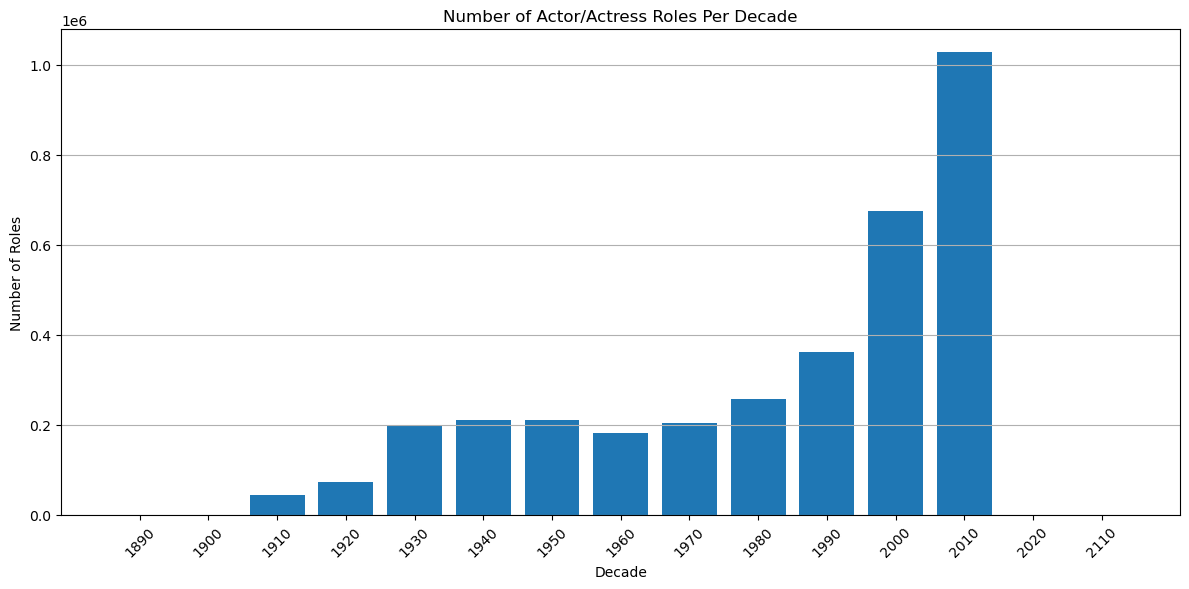

In [91]:
# Step 1: Filter for actor and actress roles
cast_roles = cast_df[cast_df['type'].isin(['actor', 'actress'])]

# Step 2: Drop missing years
cast_roles = cast_roles.dropna(subset=['year'])

# Step 3: Create a "decade" column
cast_roles['decade'] = (cast_roles['year'] // 10) * 10

# Step 4: Count roles per decade
roles_per_decade = cast_roles.groupby('decade').size()

# Step 5: Plot 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(roles_per_decade.index.astype(int).astype(str), roles_per_decade.values)
plt.title('Number of Actor/Actress Roles Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



### Question 20: Determine how many roles for actors and actresses by decade

- The number of acting roles was relatively steady from the 1930s to the 1980s, with moderate growth.
- A sharp increase begins in the 1990s, followed by an even more dramatic rise in the 2000s and 2010s.
- The 2010s alone had over 1 million actor/actress roles!

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [95]:
import pandas as pd

# Step 1: Convert 'date' column to datetime
release_dates_df['date'] = pd.to_datetime(release_dates_df['date'], errors='coerce')

# Step 2: Drop rows with missing dates
release_dates_df = release_dates_df.dropna(subset=['date'])

# Step 3: Add new columns for weekday and month
release_dates_df['weekday'] = release_dates_df['date'].dt.day_name()
release_dates_df['month'] = release_dates_df['date'].dt.month_name()

# Step 4: Create a pivot table — count of releases by weekday
weekday_pivot = pd.pivot_table(release_dates_df, 
                                index='weekday', 
                                values='title', 
                                aggfunc='count')

# Step 5: Create a pivot table — count of releases by month
month_pivot = pd.pivot_table(release_dates_df, 
                              index='month', 
                              values='title', 
                              aggfunc='count')

# Display both tables
print("Movie releases by day of the week:")
print(weekday_pivot.sort_values(by='title', ascending=False))

print("\nMovie releases by month:")
print(month_pivot.sort_values(by='title', ascending=False))


Movie releases by day of the week:
            title
weekday          
Friday     163174
Thursday   125746
Wednesday   53439
Monday      37210
Saturday    31331
Tuesday     16762
Sunday      15823

Movie releases by month:
           title
month           
March      40257
October    40204
January    39412
December   39096
November   38200
September  37750
April      37674
February   36307
May        35449
August     35011
June       32704
July       31421


### Question 21: Determine and comment on the day of the week that movies are released

Using the `release_dates.csv` file, I dove into the calendar habits of the film industry by analyzing the **day of the week** and **month** movies are released. I created new columns for `weekday` and `month`, then used a pivot table to count release frequencies.

What I found:
Release Day Observations:
- Friday dominates with over 163,000 releases, confirming that most films are released at the start of the weekend
- Thursday ranks second, probably for early previews or global rollouts
- Wednesday sneaks in as a mid-week surprise drop (especially around holidays)
- Sunday and Tuesday have the fewest releases, likely because they are non-traditional cinema days with lower attendance. Not exactly red-carpet material!

Monthly Release Observations:

Here’s where things get interesting. I was expecting July or December to lead, but surprise the crown goes to:
- March (40,257) and October (40,204): Quietly powerful months with spring indie gems and fall festival favorites.
- January and November follow (award season positioning)
- July, the “summer blockbuster” month, is last with 31,421 releases. That suggests studios may release fewer films, but bigger ones (think: Marvel, Nolan, Tom Cruise doing stunts on airplanes).

### Takeaway

The data reveals what industry folks already know, Friday is king, but the calendar is far more strategic than expected. Movie releases are a year-round game, and while some months are packed, others are quality over quantity. This insight would be especially useful for marketing teams planning release windows.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

<Axes: title={'center': 'Movie Releases by Day of the Week'}, xlabel='weekday'>

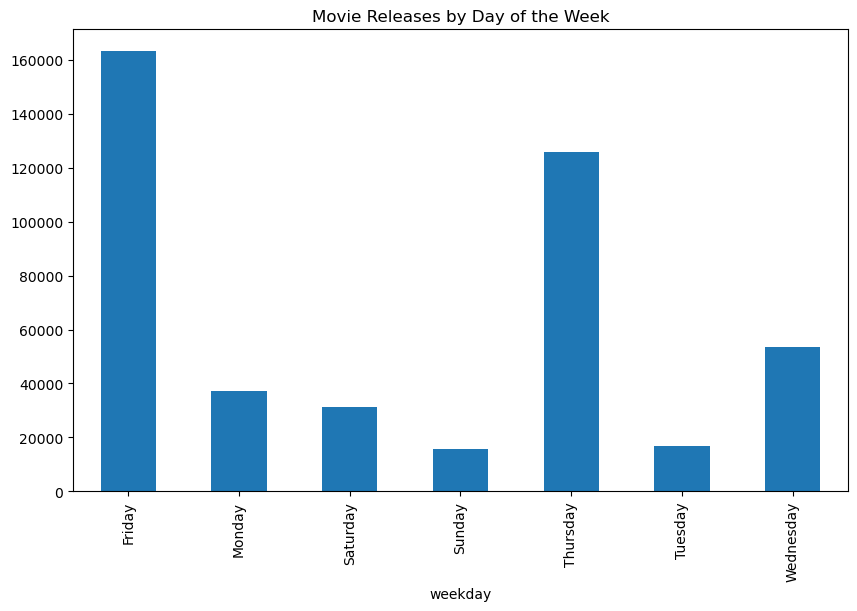

In [99]:
weekday_pivot.plot(kind='bar', legend=False, figsize=(10, 6), title='Movie Releases by Day of the Week')


The above chart works, but it’s out of order as the days are sorted alphabetically instead of Monday → Sunday, which makes it harder to read and less useful.

<Axes: title={'center': 'Movie Releases by Day of the Week'}, xlabel='weekday'>

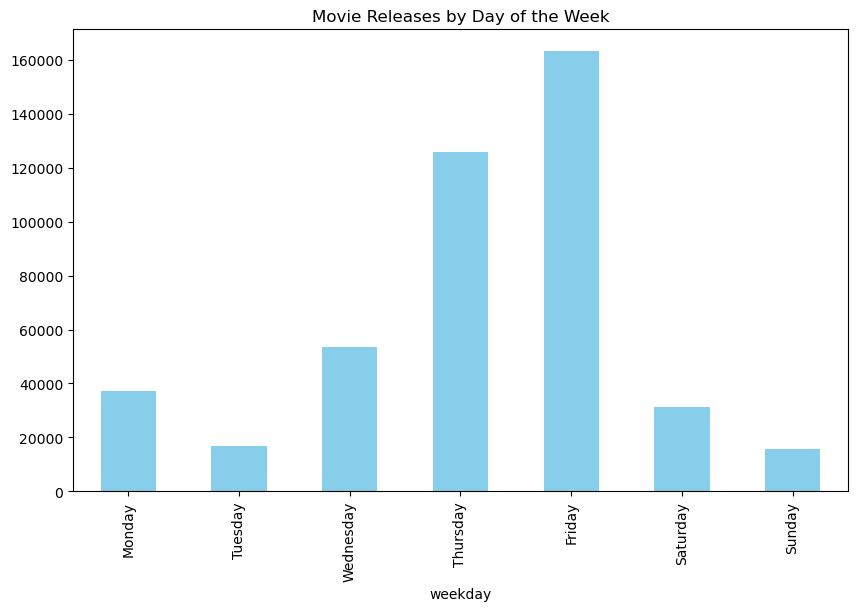

In [103]:
# FIX

# Define correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the pivot to fix the order
weekday_pivot_sorted = weekday_pivot.reindex(weekday_order)

# Plot again — correctly ordered
weekday_pivot_sorted.plot(kind='bar', legend=False, figsize=(10, 6), color='skyblue', title='Movie Releases by Day of the Week')


<Axes: title={'center': 'Movie Releases by Month'}, xlabel='month'>

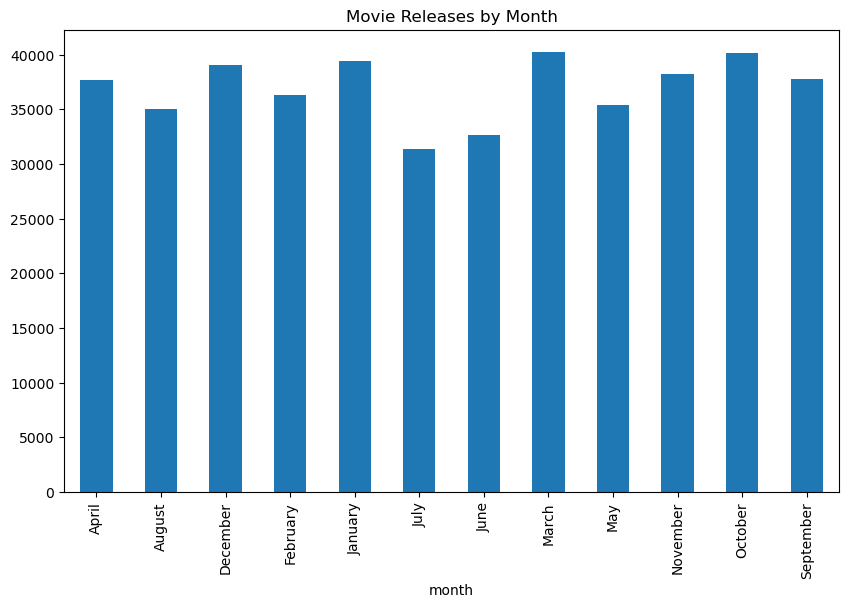

In [107]:
month_pivot.plot(kind='bar', legend=False, figsize=(10, 6), title='Movie Releases by Month')


<Axes: title={'center': 'Movie Releases by Month'}, xlabel='month'>

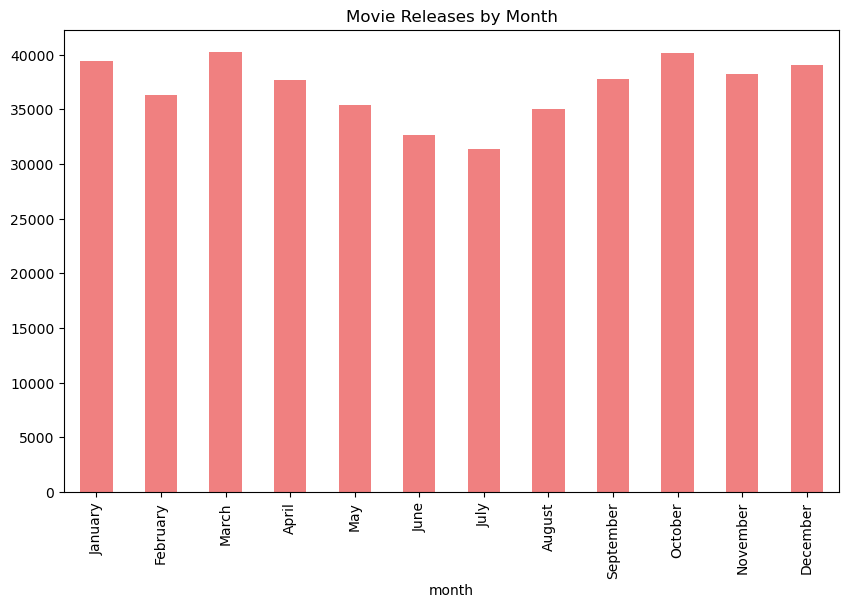

In [111]:
# FIX - Same process as months also appear in alphabetical order
# Define correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the pivot table to fix the order
month_pivot_sorted = month_pivot.reindex(month_order)

# Plot again — correctly ordered by calendar month
month_pivot_sorted.plot(kind='bar', legend=False, figsize=(10, 6), color='lightcoral', title='Movie Releases by Month')


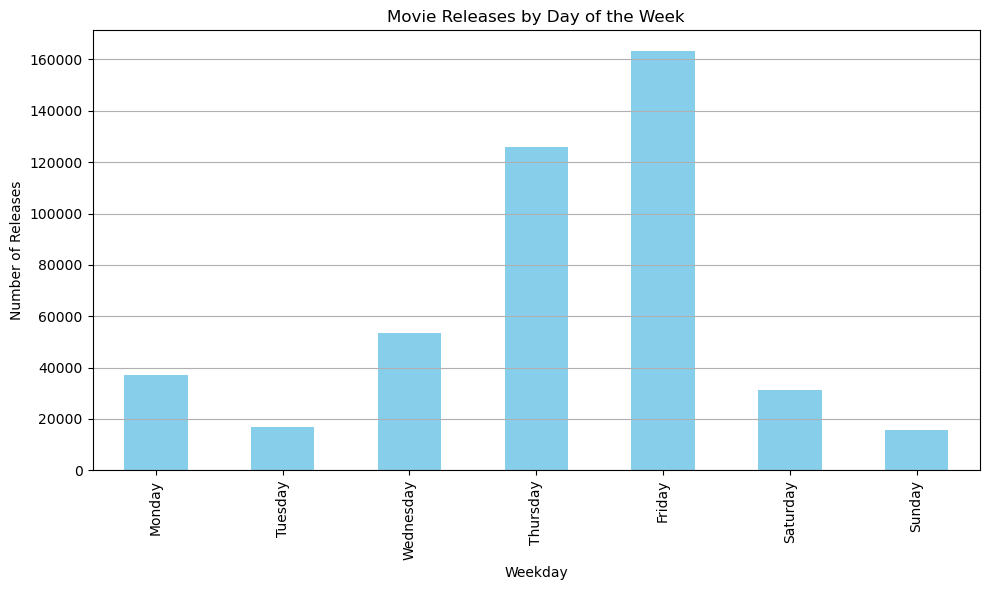

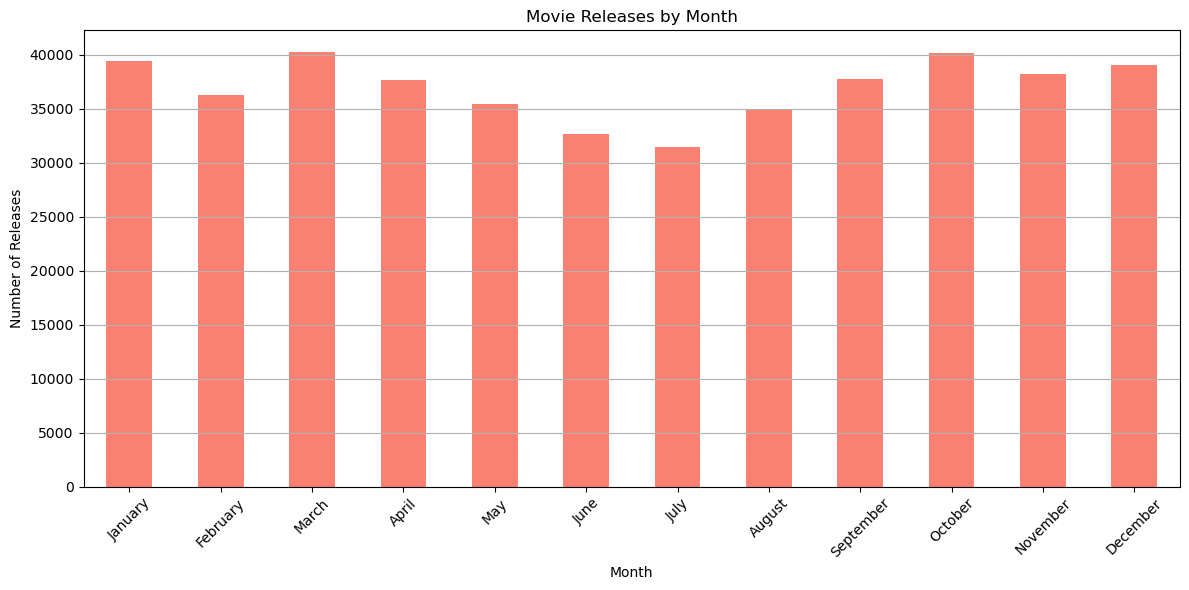

In [105]:
# Let's plot both! Weekdays and Months

import matplotlib.pyplot as plt

# Sort weekday in correct order (Mon–Sun)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_pivot_sorted = weekday_pivot.reindex(weekday_order)

# Plot weekday releases
weekday_pivot_sorted.plot(kind='bar', legend=False, figsize=(10, 6), color='skyblue')
plt.title('Movie Releases by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Releases')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_pivot_sorted = month_pivot.reindex(month_order)

# Plot month releases
month_pivot_sorted.plot(kind='bar', legend=False, figsize=(12, 6), color='salmon')
plt.title('Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 23. What films did actors in Star Wars go on to appear in? 

In [115]:
# Step 1: Get all rows where the title contains "Star Wars"
star_wars_cast = cast_df[cast_df['title'].str.contains('Star Wars', case=False, na=False)]

# Step 2: Get the unique names of actors in any Star Wars movie
star_wars_actors = star_wars_cast['name'].unique()

# Step 3: Filter cast_df to only rows where the actor is in the star_wars_actors list
other_films = cast_df[cast_df['name'].isin(star_wars_actors)]

# Optional: Exclude Star Wars films from the result
other_films_not_starwars = other_films[~other_films['title'].str.contains('Star Wars', case=False, na=False)]

# Step 4: Look at a sample of what they appeared in
other_films_not_starwars[['name', 'title', 'year']].drop_duplicates().sort_values(['name', 'year']).head(20)


,name,title,year
1076731,Aaron (IV) Kennedy,One Square Mile,2014
1076732,Aaron (IV) Kennedy,Run All Night,2015
124861,Adam Bareham,Wilt,1990
572279,Adam Driver,J. Edgar,2011
572275,Adam Driver,Frances Ha,2012
572276,Adam Driver,Gayby,2012
572280,Adam Driver,Lincoln,2012
572283,Adam Driver,Not Waving But Drowning,2012
572274,Adam Driver,Bluebird,2013
572278,Adam Driver,Inside Llewyn Davis,2013


In [117]:
# Step 1: Get Star Wars actors
star_wars_cast = cast_df[cast_df['title'].str.contains('Star Wars', case=False, na=False)]
star_wars_actors = star_wars_cast['name'].unique()

# Step 2: Get all their other movie appearances
other_films = cast_df[
    (cast_df['name'].isin(star_wars_actors)) & 
    (~cast_df['title'].str.contains('Star Wars', case=False, na=False))
]

# Step 3: Group by actor and list their other movie titles (drop duplicates to clean it up)
actor_filmography = (
    other_films[['name', 'title']]
    .drop_duplicates()
    .groupby('name')['title']
    .apply(list)
    .reset_index()
)

# Step 4: Display a sample of the result
actor_filmography.head(10)


,name,title
0,Aaron (IV) Kennedy,"[One Square Mile, Run All Night]"
1,Adam Bareham,[Wilt]
2,Adam Driver,"[Bluebird, Frances Ha, Gayby, Hungry Hearts, I..."
3,Adrian Allan,"[Acquainted, Bridget Jones: The Edge of Reason..."
4,Ahmed Best,"[FDR: American Badass!, Lean on Me, Mother and..."
5,Aidan (II) Knight,"[Sex & Drugs & Rock & Roll, The Forbidden Note]"
6,Ailsa Berk,"[Fierce Creatures, Greystoke: The Legend of Ta..."
7,Al Lampert,"[Big Zapper, Hennessy, Licensed to Love and Ki..."
8,Alan (III) Harris,"[A Countess from Hong Kong, Bullshot, Carry on..."
9,Alan Austen,"[Flash Gordon, Raiders of the Lost Ark]"


### Question 23: What films did actors in Star Wars go on to appear in?

I first filtered the dataset for all films with "Star Wars" in the title to identify the full list of cast members across the franchise. Then I searched the full dataset to find all other films those actors appeared in excluding the Star Wars titles themselves.

I created a grouped summary where each actor is listed alongside the non–Star Wars films they’ve appeared in.

### Example Results:
- **Adam Driver** → *Frances Ha*, *Lincoln*, *Inside Llewyn Davis*, *Paterson*, *Logan Lucky*, and more
- **Aaron (IV) Kennedy** → *One Square Mile*, *Run All Night*
- **Alan Austen** → *Flash Gordon*, *Raiders of the Lost Ark*

This analysis reveals the wide range of careers among *Star Wars* cast members from major stars like Adam Driver branching into indie and Oscar-nominated films, to background or minor characters who appear in cult classics, international films, and niche dramas.

## Final Summary

This assignment explored film data from IMDb using three CSV files: `cast.csv`, `titles.csv`, and `release_dates.csv`. Across 23 questions, I used `pandas`, `pivot_table`, filtering, grouping, and plotting to explore:

- Cast trends by genre, time, and ranking
- Patterns in release days and months
- Actor careers (like Natalie Portman and the *Star Wars* cast)
- Industry insights on cast sizes and production volume by decade

Along the way, I cleaned data, fixed visuals, interpreted outliers, and adjusted for clarity not just to get answers, but to understand the why behind the patterns.

Tools used: pandas, matplotlib, pivot tables, filters, grouping, and plot customization  
Skills demonstrated: data cleaning, analysis, visualization, and clear communication

If you’ve made it this far: thanks for reading. And may the plots be with you!

In [125]:
import os
os.getcwd()


'C:\\Users\\Karen Alderete\\OIM7502_SP25'